In [1]:
import findspark
findspark.init()
import pyspark
from pyspark.mllib.stat import Statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pwd

/Users/tommy/Documents/2020Spring/project


In [2]:
from pyspark import SparkContext
from pyspark.sql import SQLContext 
sc = SparkContext("local", "App Name")
sql = SQLContext(sc)

In [3]:
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("readAndFormatData") \
    .getOrCreate()

In [4]:
def string_to_vec(x):
    N = 25
    num = [ord(char) - 96 for char in x.lower()]
    res = num + [0] * (N - len(num))
    return res

In [5]:
df = spark.read.format('com.databricks.spark.csv').\
                               options(header='true', \
                               inferschema='true').\
                load("dataset.csv",header=True)

In [6]:
# spark_df = sql.createDataFrame(s5_data_df)
df = df.rdd.map(lambda x: (string_to_vec(x["Supplementary Table 5. HLA-DRB1*01:01 ligands"]))).toDF(["vec"])
df.show()

+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|vec| _2| _3| _4| _5| _6| _7| _8| _9|_10|_11|_12|_13|_14|_15|_16|_17|_18|_19|_20|_21|_22|_23|_24|_25|
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
| 11|  1| 11| 22|  1| 11| 16| 11|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|
|  8|  7| 18| 11|  6| 22| 17|  7| 11| 19|  9|  4| 22|  1|  3|  8| 16|  7|  0|  0|  0|  0|  0|  0|  0|
|  6|  7|  7| 16|  7| 20|  1| 19| 18| 16|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|
|  5| 16|  4| 18|  5| 25|  8|  6|  7| 17|  1| 22| 18|  6| 22|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|
| 11| 11| 12|  9|  5| 12| 17|  1|  7| 11| 11| 19| 12|  5|  4|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|
| 25| 22| 20| 20| 19| 20| 18| 20| 25| 19| 12|  7|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|
|  9|  8| 19| 12| 16| 16|  5|  7| 11| 12|  7|  9| 13|  5| 12|  1| 22|  7| 12| 20| 

In [7]:
spark_negative_df = spark.read.format('com.databricks.spark.csv').\
                               options(header='true', \
                               inferschema='true').\
                load("dataset_negative.csv",header=True)
df_negative = spark_negative_df.rdd.map(lambda x: (string_to_vec(x["Description"]))).toDF(["vec"])
df_negative.show()

+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|vec| _2| _3| _4| _5| _6| _7| _8| _9|_10|_11|_12|_13|_14|_15|_16|_17|_18|_19|_20|_21|_22|_23|_24|_25|
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
| 12| 20| 14| 17| 14|  9| 14|  9|  4| 17|  5|  6| 14| 12| 13| 11|  8|  7|  6|  8|  0|  0|  0|  0|  0|
| 25| 20| 14| 17| 14|  9| 14|  9| 19| 13|  5| 18| 14| 12| 13| 11|  8|  7|  6|  8|  0|  0|  0|  0|  0|
| 25| 20| 14| 17| 14|  9| 14|  9| 19| 13|  5| 18| 14| 12| 13| 11|  8|  7|  6|  8|  0|  0|  0|  0|  0|
| 25| 20| 14| 17| 14|  9| 14|  9| 19| 13|  5| 18| 14| 12| 13| 11|  8|  7|  6|  8|  0|  0|  0|  0|  0|
| 12| 20| 14| 17| 14|  9| 14|  9|  4| 17|  5|  6| 16| 12| 13| 11|  8|  7|  6|  8|  0|  0|  0|  0|  0|
|  5| 11|  1| 11|  5|  5|  1| 25| 11|  1|  1|  1|  1|  1|  1|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|
|  5| 11| 16| 11|  5|  5|  1|  6| 11|  1|  1|  1|  1| 16|  1|  0|  0|  0|  0|  0| 

In [8]:
positive = df.toPandas()
positive_ = positive.to_numpy()
all_positive = np.array(positive_.tolist())
positive_size = all_positive.shape[0]
all_positive

array([[11,  1, 11, ...,  0,  0,  0],
       [ 8,  7, 18, ...,  0,  0,  0],
       [ 6,  7,  7, ...,  0,  0,  0],
       ...,
       [11, 12,  1, ...,  0,  0,  0],
       [11, 11, 11, ...,  5, 12,  9],
       [12,  4, 12, ...,  0,  0,  0]])

In [10]:
negative = df_negative.toPandas()
negative_ = negative.to_numpy()
all_negative = np.array(negative_.tolist())
negative_size = all_negative.shape[0]
choice = np.random.choice(negative_size, positive_size)
all_negative = all_negative[choice]
all_negative

array([[19, 16,  6, ...,  0,  0,  0],
       [ 7, 20, 22, ...,  0,  0,  0],
       [25,  9, 14, ...,  0,  0,  0],
       ...,
       [ 4,  6,  9, ...,  0,  0,  0],
       [19,  1,  6, ...,  0,  0,  0],
       [18,  7, 22, ...,  0,  0,  0]])

In [11]:
negative_size = positive_size

In [12]:
X = np.concatenate((all_negative, all_positive), axis=0)
y = [0] * negative_size + [1] * positive_size
combined = X

In [28]:
def visualize_PCA(combined):
    from sklearn.decomposition import PCA
    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt
    
    pca = PCA(n_components=3)
    pca_result = pca.fit_transform(combined)
    pca1 = pca_result[:,0]
    pca2 = pca_result[:,1] 
    pca3 = pca_result[:,2]
    print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
    
    ax = plt.figure(figsize=(16,10)).gca(projection='3d')
    color = [[1,0,0,0.5]] * negative_size + [[0,0,1,0.5]] * positive_size
    color = np.array(color)
    ax.scatter(
        xs=pca1, 
        ys=pca2, 
        zs=pca3, 
        c=color, 
        cmap='tab10'
    )
    ax.set_xlabel('pca-one')
    ax.set_ylabel('pca-two')
    ax.set_zlabel('pca-three')
    plt.show()

Explained variation per principal component: [0.15383177 0.08117623 0.07174619]


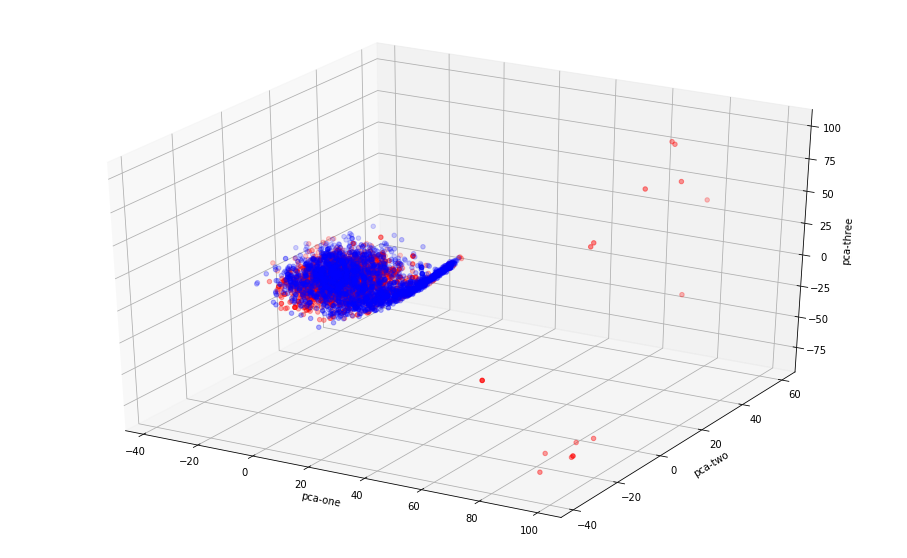

In [29]:
visualize_PCA(combined)

In [30]:
def visualize_TSNE(combined, positive_size, negative_size):
    from sklearn.manifold import TSNE
    
    tsne = TSNE()
    combined_tsne = tsne.fit_transform(combined)
    
    color = [[1,0,0,0.5]] * negative_size + [[0,0,1,0.5]] * positive_size
    color = np.array(color)


    fig, ax = plt.subplots(figsize=(16,10))
    plt.scatter(combined_tsne[:negative_size,0], combined_tsne[:negative_size,1], c=[1,0,0,0.8], label='negative')
    plt.scatter(combined_tsne[positive_size:,0], combined_tsne[positive_size:,1], c=[0,0,1,0.1], label='positive')
    ax.legend()
    ax.grid(True)

    plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


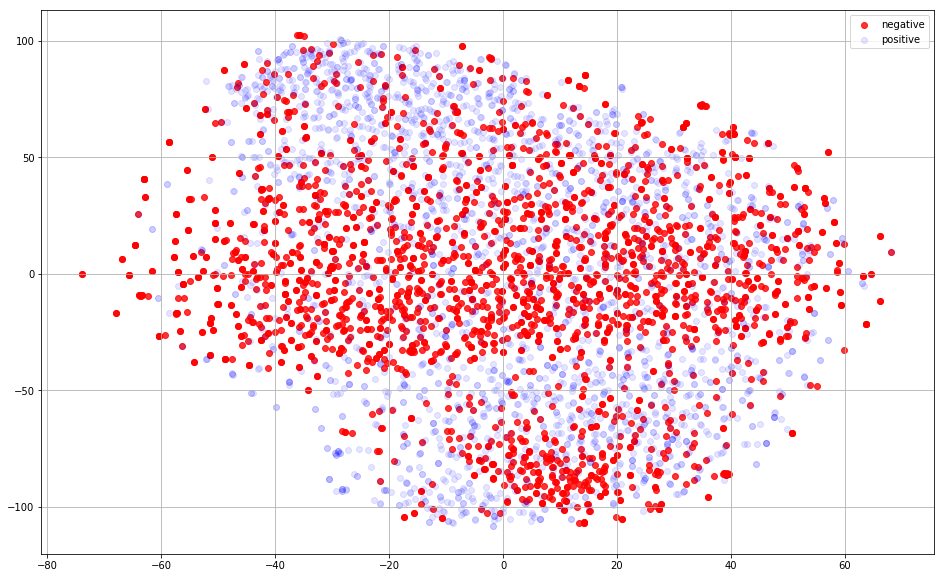

In [31]:
visualize_TSNE(combined, positive_size, negative_size)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *

def classification_metrics(Y_pred, Y_true):
    Y_pred_acc = [0 if x[0] > x[1] else 1 for x in Y_pred]
    Y_pred_prob = [x[1] for x in Y_pred]
    acc = accuracy_score(Y_true, Y_pred_acc)
    fpr, tpr, thresholds = roc_curve(Y_true, Y_pred_prob, pos_label=1)
    auc_s = auc(fpr, tpr)
    precision, recall, fscore, support = precision_recall_fscore_support(Y_true, Y_pred_acc)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc_s)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return acc,auc_s,precision[1],recall[1],fscore[1], fpr, tpr

def display_metrics(classifierName,Y_pred,Y_true):
    print("______________________________________________")
    print(("Classifier: "+classifierName))
    acc, auc_, precision, recall, f1score, fpr, tpr = classification_metrics(Y_pred,Y_true)
    print(("Accuracy: "+str(acc)))
    print(("AUC: "+str(auc_)))
    print(("Precision: "+str(precision)))
    print(("Recall: "+str(recall)))
    print(("F1-score: "+str(f1score)))
    print("______________________________________________")
    print("")
    return fpr, tpr
    
RANDOM_STATE = 545510477
def logistic_regression_pred(X_train, Y_train, X_test):
    clf = LogisticRegression(random_state=RANDOM_STATE).fit(X_train, Y_train)
    res = clf.predict_proba(X_test)
    return res

def svm_pred(X_train, Y_train, X_test):
    clf = clf = SVC(C=1.0, probability=True) #LinearSVC(random_state=RANDOM_STATE, tol=1e-5)
    clf.fit(X_train, Y_train)
    res = clf.predict_proba(X_test)
    return res

def decisionTree_pred(X_train, Y_train, X_test):
    clf = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=15)
    clf.fit(X_train, Y_train)
    res = clf.predict_proba(X_test)
    return res

In [23]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
len(X_train)

3254

______________________________________________
Classifier: Logistic Regression


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


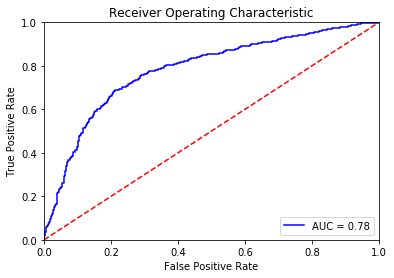

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.729426433915212
AUC: 0.7821511650523205
Precision: 0.7214377406931964
Recall: 0.7214377406931964
F1-score: 0.7214377406931964
______________________________________________

______________________________________________
Classifier: SVM


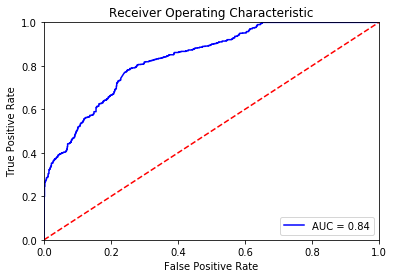

Accuracy: 0.6633416458852868
AUC: 0.8371050686583421
Precision: 0.5908745247148289
Recall: 0.9974326059050064
F1-score: 0.7421203438395416
______________________________________________

______________________________________________
Classifier: Decision Tree


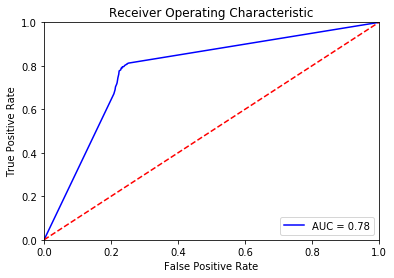

Accuracy: 0.7786783042394015
AUC: 0.7813078149920255
Precision: 0.7598039215686274
Recall: 0.7958921694480102
F1-score: 0.7774294670846396
______________________________________________



In [24]:
lr = display_metrics("Logistic Regression",logistic_regression_pred(X_train,Y_train,X_test),Y_test)
svm = display_metrics("SVM",svm_pred(X_train,Y_train,X_test),Y_test)
dt = display_metrics("Decision Tree",decisionTree_pred(X_train,Y_train,X_test),Y_test)

In [42]:
rnn = pd.read_csv('rnn_roc.csv')
rnn.astype(np.float)

,fpr,tpr
0,0.000000,0.000000
1,0.000000,0.000672
2,0.000000,0.004704
3,0.000000,0.006720
4,0.000000,0.007392
5,0.000000,0.008737
6,0.000000,0.016129
7,0.000000,0.017473
8,0.000000,0.025538
9,0.000096,0.025538


4206 4206
657 657
593 593
19 19


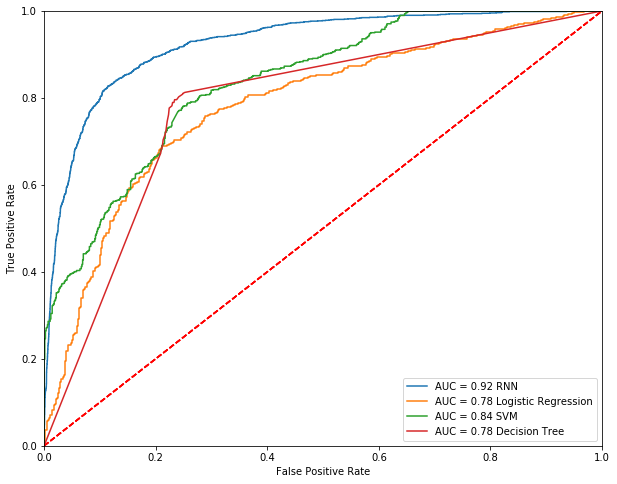

In [43]:
rnn = pd.read_csv('rnn_roc.csv')
rnn = [pd.to_numeric(rnn.fpr, errors='coerce').dropna().to_list(), pd.to_numeric(rnn.tpr, errors='coerce').dropna().to_list()]
        
def draw(ax, aucs, title):
    auc_s = auc(aucs[0], aucs[1])
    print(len(aucs[0]), len(aucs[1]))
    ax.plot(aucs[0], aucs[1], label = 'AUC = %0.2f ' % auc_s + title)
    ax.legend(loc = 'lower right')
    ax.plot([0, 1], [0, 1],'r--')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_ylabel('True Positive Rate')
    ax.set_xlabel('False Positive Rate')

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

draw(ax, rnn, 'RNN')
draw(ax, lr, 'Logistic Regression')
draw(ax, svm, 'SVM')
draw(ax, dt, 'Decision Tree')
plt.show()